In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.ensemble import IsolationForest


In [2]:
# Import the files
from google.colab import files
upoaded=files.upload()

Saving adult_with_headers.csv to adult_with_headers (1).csv


##1.Data Exploration and Preprocessing:

In [3]:
df=pd.read_csv('adult_with_headers.csv') # Load the dataset into pandas dataframe

In [4]:
df.head() # Display the first few rows of the dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.tail() # Display the last few rows of the dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.size

488415

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [12]:
df.dtypes.value_counts()

,0
object,9
int64,6


In [13]:
num_col=df.select_dtypes(include=np.number).columns
num_col

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

Standard Scaler

In [14]:
# Standaardize numerical features using StandardScaler
standard_scaler=StandardScaler()
Standard_scaler_data=pd.DataFrame(standard_scaler.fit_transform(df[num_col]),columns=num_col)
Standard_scaler_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


MinMaxScaler

In [15]:
# Scale numerical features using MinMaxScaler
min_max_scaler=MinMaxScaler()
min_max_scaler_data=pd.DataFrame(min_max_scaler.fit_transform(df[num_col]),columns=num_col)
min_max_scaler_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


**The scenarios where each scaling technique is preferred and why**

Standard Scaling (Z-score normalization):

This technique centers the values around the mean (mean = 0) and scales them to unit variance (std = 1).
Best For: Algorithms sensitive to the scale of data, such as SVMs, logistic regression, and neural networks, where normal distribution assumptions can improve model performance.

Min-Max Scaling (Normalization):

This technique scales the data to a fixed range, typically [0, 1].
Best For: Algorithms that don’t assume normally distributed data, such as k-nearest neighbors or when working with neural networks that perform better with normalized inputs.


##2.Encoding Techniques:


In [16]:
# Categorical columns
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [17]:
# Separate columns based on category count
onehot_columns=[col for col in cat_col if df[col].nunique()<5]
label_columns=[col for col in cat_col if df[col].nunique()>5]

In [18]:
# Apply onehotencoding
onehot_encoder=OneHotEncoder(sparse_output=False)
onehot_encoded_data=pd.DataFrame(onehot_encoder.fit_transform(df[onehot_columns]),columns=onehot_encoder.get_feature_names_out(onehot_columns))
onehot_encoded_data.head()

,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0


In [19]:
# Apply labelencoding
label_encoder=LabelEncoder()
label_encoded_data=pd.DataFrame()
for col in label_columns:
  label_encoded_data[col]=label_encoder.fit_transform(df[col])
label_encoded_data.head()

,workclass,education,marital_status,occupation,relationship,native_country
0,7,9,4,1,1,39
1,6,9,2,4,0,39
2,4,11,0,6,1,39
3,4,1,2,6,0,39
4,4,9,2,10,5,5


##3.Feature Engineering:

In [20]:
# Creating new features
# 1. Age Group Feature
def categorize_age(age):
    if age < 25:
        return 'Under 25'
    elif 25 <= age <= 40:
        return '25-40'
    elif 40 < age <= 60:
        return '40-60'
    else:
        return 'Over 60'
df['age_group']=df['age'].apply(categorize_age)


In [21]:
# 2.Capital income feature
# Capital income as the difference between capital gain and capital loss
df['capital_income']=df['capital_gain']-df['capital_loss']

**New Features**

Age Group:

Rationale: Age is likely an influential factor for income level, as people in certain age groups may have different earning potentials (e.g., young adults, mid-career, nearing retirement). By grouping age into ranges, the model can more easily learn patterns related to age without focusing on individual age values, which may also help reduce variance.

Capital Income:

Rationale: Both capital_gain and capital_loss are measures of income from investments, which may influence total wealth or economic stability. Combining them into a single capital_income feature can summarize the effect of non-salary income and reduce dimensionality without losing information.


In [22]:
# Applying log transformation to capital_gain to address skewness
# Adding 1 to handle log(0) cases
df['capital_gain_log'] = np.log1p(df['capital_gain'])

# Display the first few rows of the modified dataset with new features
df[['age', 'age_group', 'capital_gain', 'capital_loss', 'capital_income', 'capital_gain_log']].head()


,age,age_group,capital_gain,capital_loss,capital_income,capital_gain_log
0,39,25-40,2174,0,2174,7.684784
1,50,40-60,0,0,0,0.000000
2,38,25-40,0,0,0,0.000000
3,53,40-60,0,0,0,0.000000
4,28,25-40,0,0,0,0.000000


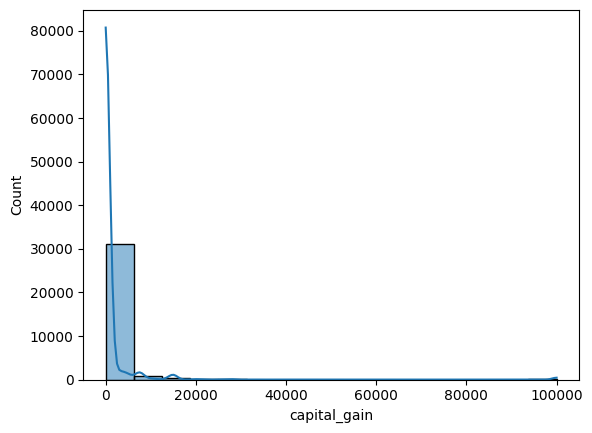

In [23]:
# Check the distribution after transformation
sns.histplot(df['capital_gain'], kde=True)
plt.show()

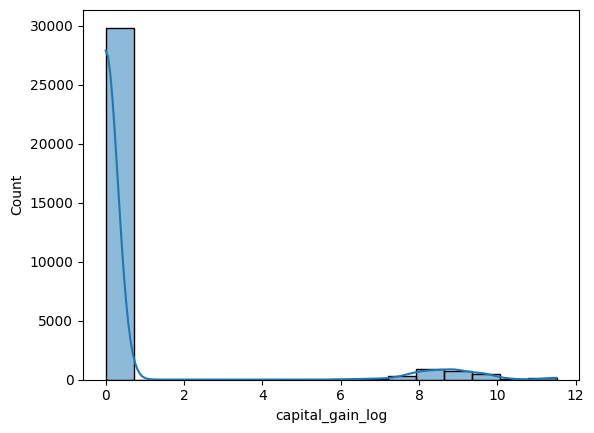

In [24]:
# Check the distribution after transformation
sns.histplot(df['capital_gain_log'], kde=True)
plt.show()

Transforming a Skewed Feature

Capital Gain:

Observation: The capital_gain column appears highly skewed based on summary statistics (mean is much smaller than the maximum value, indicating many zero or small values with a few extreme high values).

Transformation: Applying a logarithmic transformation to reduce skewness, which will compress large values and enhance the impact of smaller values, potentially improving model performance.

##4.Feature Selection:

In [25]:
num_col

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [26]:
isolation_forest=IsolationForest(contamination=0.01,random_state=42)
isolation_forest.fit(df[num_col])
outlier_prediction=isolation_forest.predict(df[num_col])

In [27]:
# Adding a new column to indicate outliers in the data (-1 = outlier, 1 = inlier)
df['outlier'] = outlier_prediction

In [28]:
# Filtering out the outliers
cleaned_data = df[df['outlier'] == 1].drop(columns=['outlier'])

In [29]:
original_count = df.shape[0]
cleaned_count = cleaned_data.shape[0]
original_count

32561

In [30]:
cleaned_count

32235

In [31]:
cleaned_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_group,capital_income,capital_gain_log
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,25-40,2174,7.684784
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,40-60,0,0.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,25-40,0,0.000000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-60,0,0.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,25-40,0,0.000000


Impact of Outliers on Model Performance

Outliers can significantly affect model performance in various ways:

Biasing Model Parameters:

Outliers can heavily influence the parameters of models sensitive to individual data points (e.g., linear regression or k-means clustering). For instance, an extremely high outlier value can skew the model parameters, leading to inaccurate predictions for non-outliers.

Reduced Generalization:

Models trained on data with outliers may overfit these extreme cases, resulting in poor generalization on new data. Removing outliers can improve generalization by helping the model focus on the “core” patterns in the data.

Error in Prediction Metrics:

Outliers can distort metrics like mean squared error (MSE), making it hard to assess model performance accurately. Removing outliers can help provide a more accurate representation of performance.

Incorrect Decision Boundaries:

In algorithms like SVM or decision trees, outliers can cause inappropriate boundaries, leading to increased classification errors.

In [32]:
!pip install ppscore==0.0.2

In [33]:
import ppscore as pps

In [34]:
pps_matrix=pps.matrix(cleaned_data)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [35]:
print(pps_matrix)

                       age     workclass    fnlwgt  education  education_num  \
age               1.000000  1.861780e-02  0.000000   0.020756       0.020756   
workclass         0.004910  1.000000e+00  0.000000   0.002184       0.002184   
fnlwgt            0.000000  0.000000e+00  1.000000   0.000000       0.000000   
education         0.077715  2.945556e-02  0.043898   1.000000       1.000000   
education_num     0.000000  0.000000e+00  0.000000   1.000000       1.000000   
marital_status    0.364580  3.874752e-02  0.084479   0.104997       0.104997   
occupation        0.089829  1.360549e-01  0.084085   0.111614       0.111614   
relationship      0.227841  2.241274e-02  0.064775   0.029071       0.029071   
race              0.000000  0.000000e+00  0.000000   0.000000       0.000000   
sex               0.089401  0.000000e+00  0.099326   0.000000       0.000000   
capital_gain      0.000000  0.000000e+00  0.000000   0.000000       0.000000   
capital_loss      0.000000  0.000000e+00

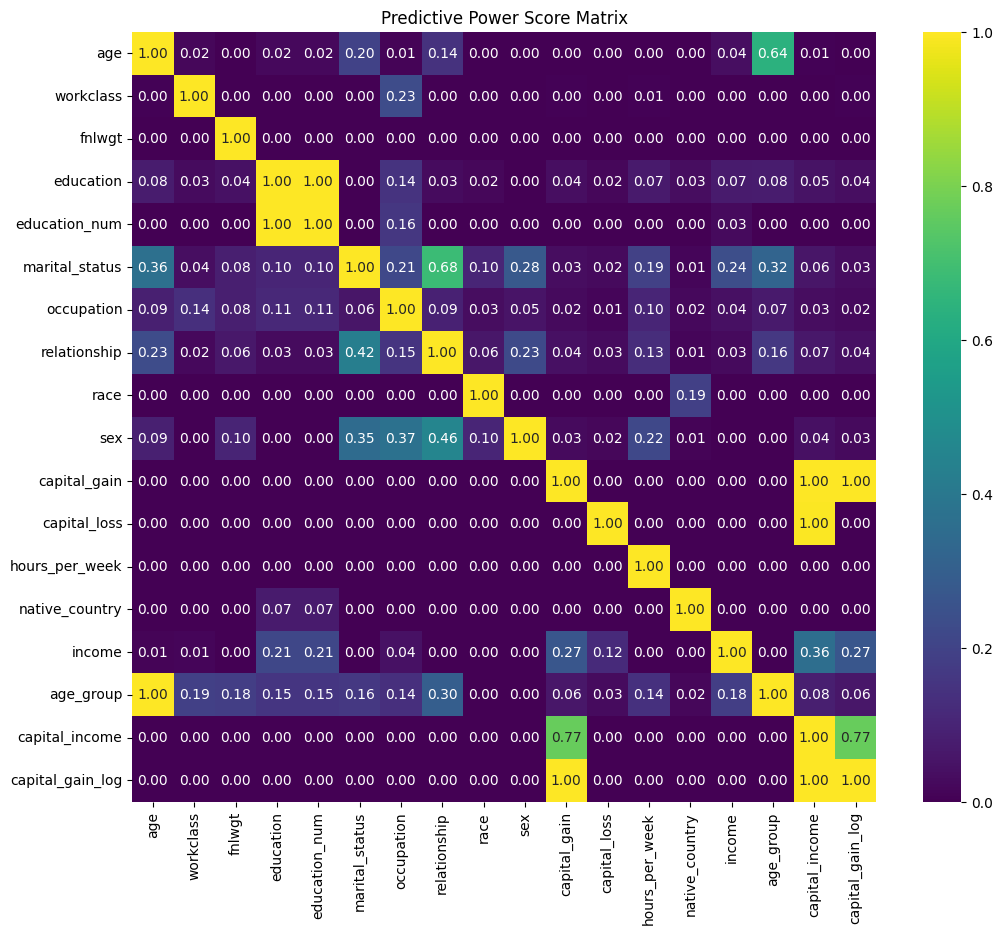

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(pps_matrix,annot=True, cmap='viridis', fmt=".2f")
plt.title('Predictive Power Score Matrix')
plt.show()

In [37]:
num_cols = cleaned_data.select_dtypes(include=np.number).columns

In [38]:
corr_matrix=cleaned_data[num_cols].corr()

In [39]:
print(corr_matrix)

                       age    fnlwgt  education_num  capital_gain  \
age               1.000000 -0.077302       0.031440      0.108184   
fnlwgt           -0.077302  1.000000      -0.043846     -0.008207   
education_num     0.031440 -0.043846       1.000000      0.141995   
capital_gain      0.108184 -0.008207       0.141995      1.000000   
capital_loss      0.040729 -0.013248       0.078918     -0.047679   
hours_per_week    0.071138 -0.021618       0.144119      0.082815   
capital_income    0.100213 -0.006100       0.127768      0.989034   
capital_gain_log  0.113960 -0.006445       0.109553      0.829529   

                  capital_loss  hours_per_week  capital_income  \
age                   0.040729        0.071138        0.100213   
fnlwgt               -0.013248       -0.021618       -0.006100   
education_num         0.078918        0.144119        0.127768   
capital_gain         -0.047679        0.082815        0.989034   
capital_loss          1.000000        0.045678  

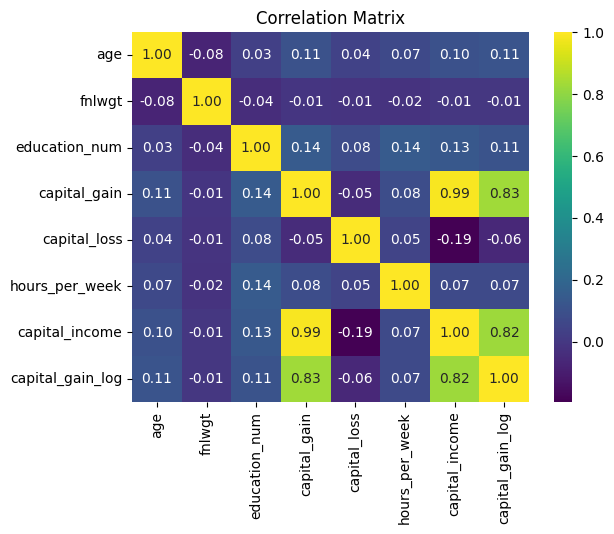

In [40]:
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()